Interpret the matrix $ \Lambda $ as the weight matrix of a graph $ \mathcal{G}= (\mathcal{V},\mathcal{E}, \Lambda ) $ , and simulate the French-DeGroot dynamics on $ \mathcal{G} $ with an arbitrary initial condition x(0). Does the dynamics converge to a consensus state for every initial condition $\mathcal{x}(0)$? Motivate your answer

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice, rand
%matplotlib inline
options = {
    'node_size': 500,
    'width': 1, # width of the edges,
    'node_color': '#ffffff',
    'node_shape': 'o',
    'edge_color': 'black',
    'font_weight':'normal'
}

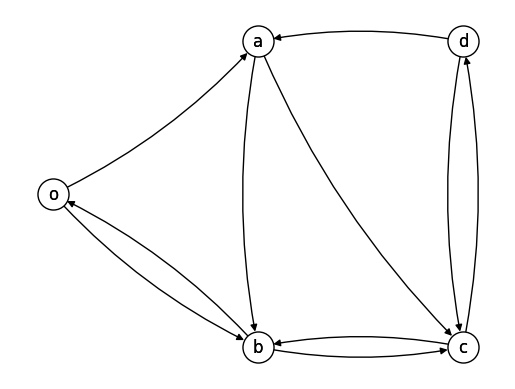

In [2]:
#defining and printing the give graph
nodes = ['o', 'a', 'b', 'c', 'd']
edges = [('o','a'), ('o','b'), ('a','b'), ('a','c'), ('b','c'), ('b','o'),
         ('c','b'), ('c','d'), ('d','a'), ('d','c')]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 5), 'c':(80,5), 'd': (80, 35)}
node_list = list(G.nodes())


plt.subplot(111)

nx.draw(G, pos, with_labels=True, **options, connectionstyle="arc3,rad=0.1")
nx.draw_networkx_labels(G, pos) #Draw node labels on the graph
ax= plt.gca()
ax.collections[0].set_edgecolor("black")

From the graph, we can observe that it is strongly connected, as for all nodes 𝑖 and 𝑗, 𝑖 is reachable from 𝑗. Additionally, the graph is aperiodic because it is possible to return to a node in a varying number of steps, meaning it has a period of 1.

In [3]:
#Already constructed P
#redraw for a moment the graph

#number of iterations to simulate 
n_iter = 70

# matrix to store the opinions of the nodes at each time step
x = np.zeros((G.number_of_nodes(),n_iter))

#defining Lambda
Lambda = np.array([

    #o    a    b   c  d
     [0, 2/5, 1/5, 0, 0], #o
     [0, 0, 3/4, 1/4, 0], #a
     [1/2, 0, 0, 1/3, 0], #b
     [0, 0, 1/3, 0, 2/3], #c
     [0, 1/2, 0, 1/3, 0]  #d

])

#defining w for the clock in continuos time
w = np.sum(Lambda, axis=1)

#Compute matrices of graph G
P = np.linalg.inv(np.diag(w))@Lambda #P is the normlized weight matrix

# set an arbitrary initial condition (1,0,0,0,1) (There is consensus just if at the x(t) = x(0))
x[:,0] = np.random.rand(G.number_of_nodes())
print("The initial value is: ", x[:,0] )


# Calculate the vector of opinions at eah step
for t in range(1,n_iter):
    x[:,t] = P @ x[:,t-1]

x[:,n_iter-1]

The initial value is:  [0.58974539 0.66706217 0.88516918 0.74794812 0.07680502]


array([0.64638594, 0.64638594, 0.64638594, 0.64638594, 0.64638594])

After analyzing the evolution of the initial condition, we observe that all nodes eventually reach consensus. This indicates the existence of a single sink in the graph. Consequently $ \alpha = \pi'x(0) $  

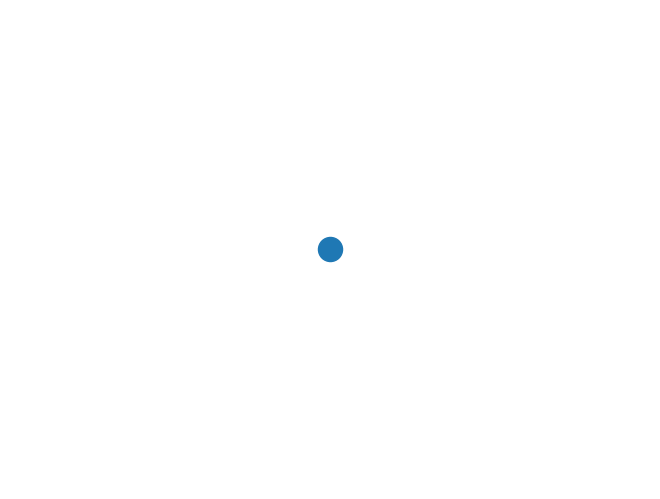

In [4]:
CG = nx.algorithms.components.condensation(G)

nx.draw(CG)

When plotting the consensus graph, we observe the presence of a single sink, which ensures that the system reaches consensus. The consensus value $\alpha$ can be calculated using the weights provided by the (unique) invariant distribution. $\pi$.


In [5]:
values,vectors = np.linalg.eig(P.T)

# selects the eigenvalue 1 and print the eigenvector
for index in [i for i in range(len(G)) if np.isclose(values[i],1)]:
    pi = vectors[:,index].real  # -> get the real part of the eigenvector
    pi = pi/np.sum(pi)
    print("pi", index, "=", pi)
    
#found pi, we have to multiply by the initial condition
x0 = x[:,0]


print("The consensus value is:", pi@x0)

pi 0 = [0.16521739 0.19710145 0.27536232 0.2173913  0.14492754]
The consensus value is: 0.6463859351096093


From the results, we observe that since all nodes belong to the sink, all values in the invariant distribution are non-zero, indicating that the evolution is influenced by all nodes. Recall that $\pi$ solving $\pi = P' \pi$ is also the invariant distribution centrality, thus the more a node is central the more its initial opinion affects the consensus value. Additionally, we can identify the most central node as $\mathcal{b}$ as it briefly has the greatest impact on the opinions of other nodes. It is followed in influence by nodes $\mathcal{c}$, $\mathcal{a}$, $\mathcal{o}$, and finally $\mathcal{d}$, in this order.

However, since the differences in influence are not significant, changing the opinion of node $\mathcal{b}$ would not drastically affect the consensus value.

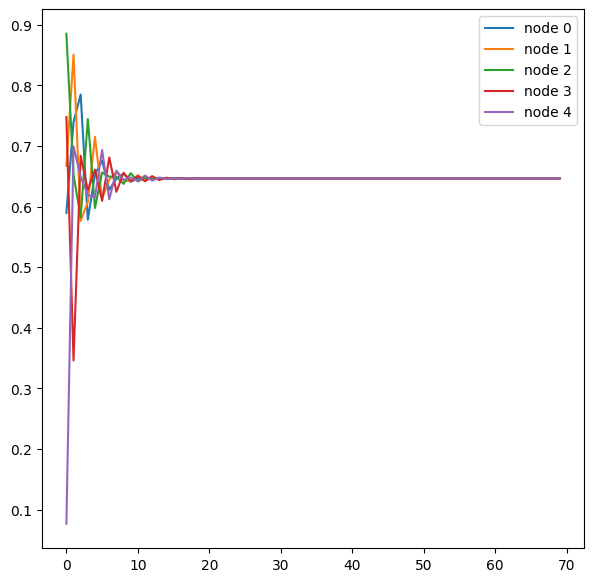

In [6]:
#plot the record of the consensus vector to have a better look of the convergence
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(G.number_of_nodes()):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))

ax.legend()

period? 
aperiodic?
Periodicity of the graph does not allow a proper mixing of the opinions.

The dynamics reachs an equilibrium, which is a consensus.

it must exist one single sink at the end to reach consensus

Condense Graph-> to do 